## Throughput Graph

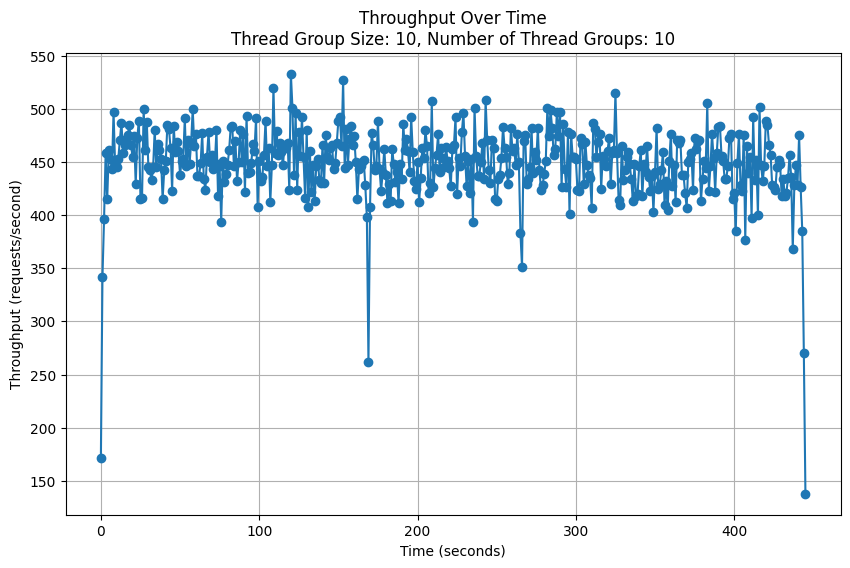

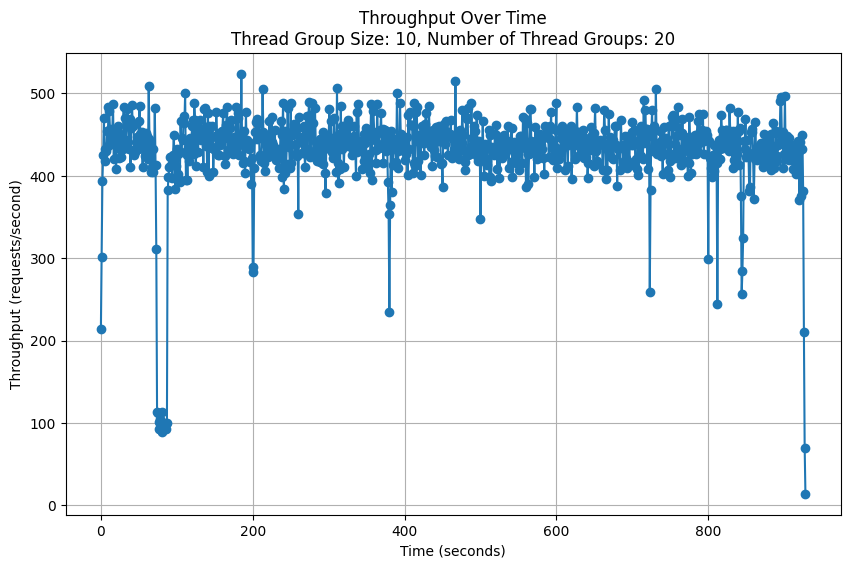

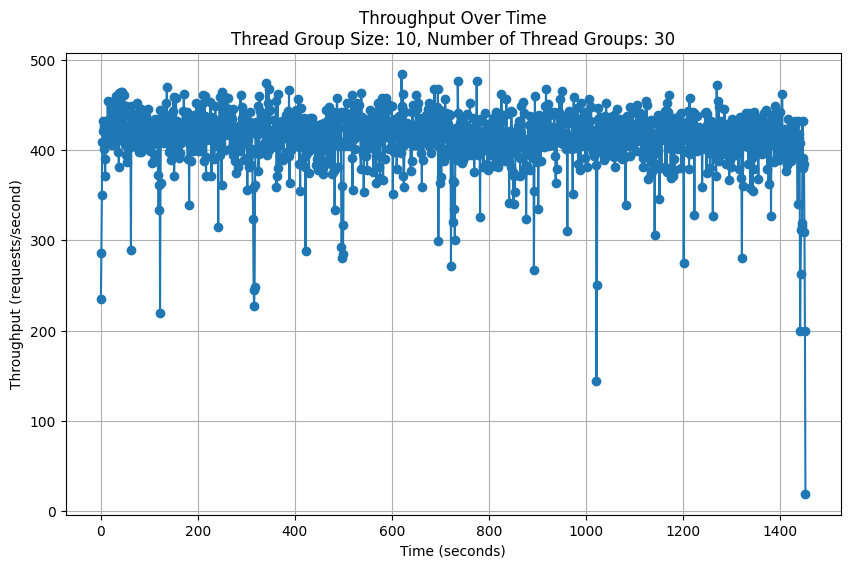

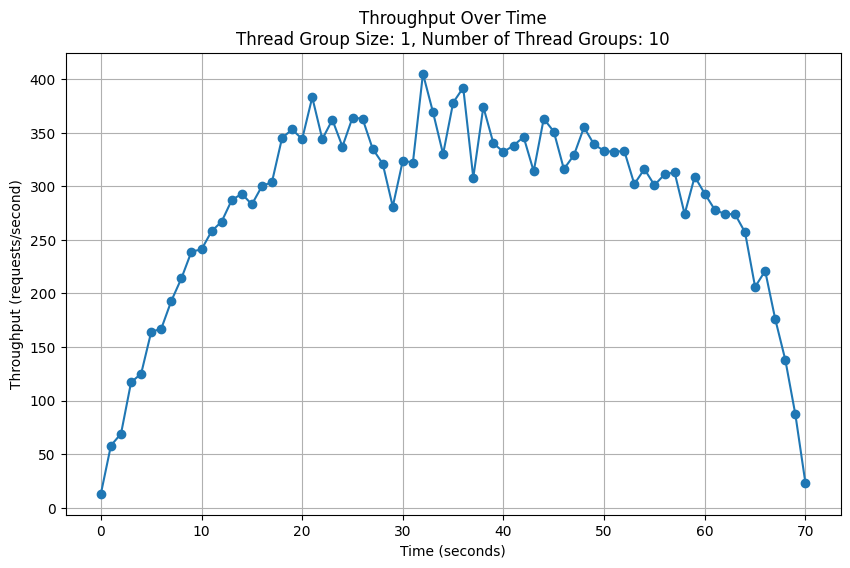

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

# Get all CSV files matching the pattern "response_time_size-*_*.csv" in the current folder
csv_files = glob.glob('response_time_size-*_*.csv')

# Initialize an empty list to hold all the data
all_data = []

# Load each CSV file and append the data to the list
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    all_data.append((csv_file, data))

# Check if there are any CSV files to process
if all_data:
    for csv_file, data in all_data:
        # Extract threadGroupSize and numThreadGroups from the file name
        match = re.search(r'response_time_size-(\d+)_(\d+)_groups\.csv', csv_file)
        if match:
            threadGroupSize = match.group(1)
            numThreadGroups = match.group(2)

            # Convert start_time from milliseconds to seconds
            data['start_time'] = data['start_time'] // 1000

            # Calculate the throughput per second
            throughput = data.groupby('start_time').size()

            # Plot the graph
            plt.figure(figsize=(10, 6))
            plt.plot(throughput.index - throughput.index.min(), throughput.values, marker='o')
            plt.xlabel('Time (seconds)')
            plt.ylabel('Throughput (requests/second)')
            plt.title(f'Throughput Over Time\nThread Group Size: {threadGroupSize}, Number of Thread Groups: {numThreadGroups}')
            plt.grid(True)
            plt.show()
else:
    print("No CSV files found matching the pattern 'response_time_size-*_*.csv'")